# Medicine Sales Analysis

In [10]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("./data/pharmacy_sales.csv")

# Convert the 'DateTime' column to actual datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d-%m-%Y %H:%M', errors='coerce')

# New column for date and time
df['Date'] = df['DateTime'].dt.date
df['Time'] = df['DateTime'].dt.time

**This section analyzes the daily total medicine sales trend based on revenue using a line chart.**

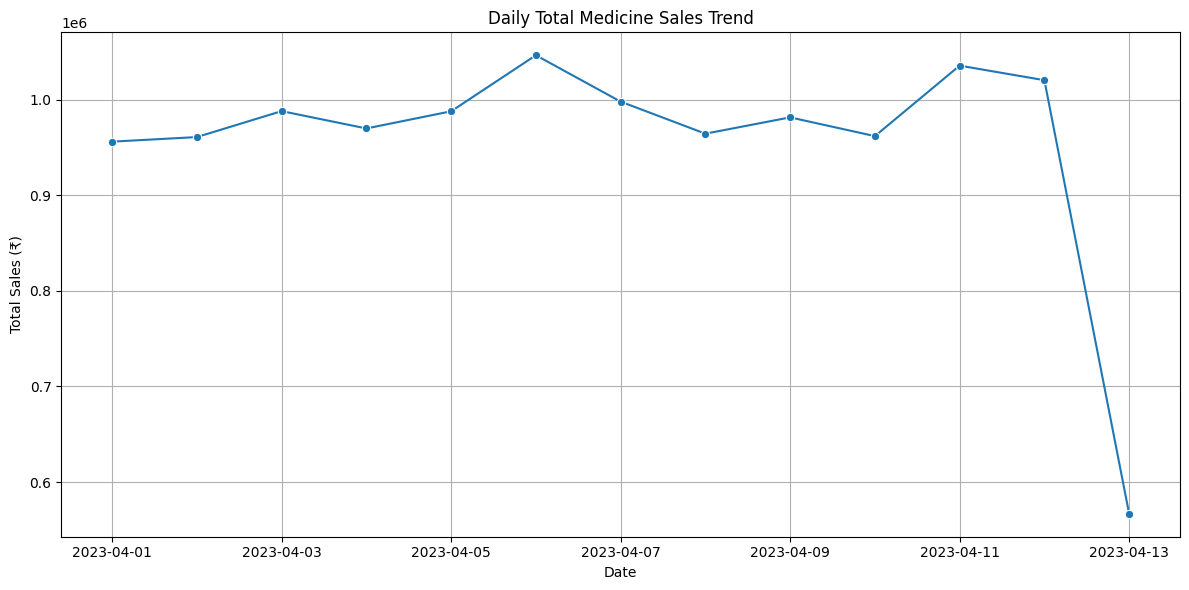

In [11]:
# Group the data by each day and calculate the total sales for that day
daily_sales = df.groupby('Date')['TotalSales'].sum().reset_index()

# Size of the chart
plt.figure(figsize=(12, 6))

# Create a line chart & add a title
sns.lineplot(data=daily_sales, x='Date', y='TotalSales', marker='o')
plt.title("Daily Total Medicine Sales Trend")

# Label X-axis & y-axis
plt.xlabel("Date")
plt.ylabel("Total Sales (₹)")

# Add gridlines 
plt.grid(True)

# Adjust spacing 
plt.tight_layout()

# Display chart
plt.show()

### Observed Trends
- The overall sales trend is relatively stable, with daily total sales hovering around ₹950,000 to ₹1,050,000

- Revenue peaked on April 6 (highest) and April 11 (second-highest).

- A sharp decline is seen on April 13, where revenue dropped drastically compared to all previous days.

### Suggestions

- Ensure sufficient stock and staff coverage on peak days like April 6 and April 11.

- Consider customer engagement on stable sales days to maintain demand.

### Limitations

- The trend is based on revenue , not quantity 

- External factors (e.g, holidays, promotions, doctor availability) are not considered in this analysis.

**This section analyzes the daily total medicine sales trend based on quantity using a line chart.**

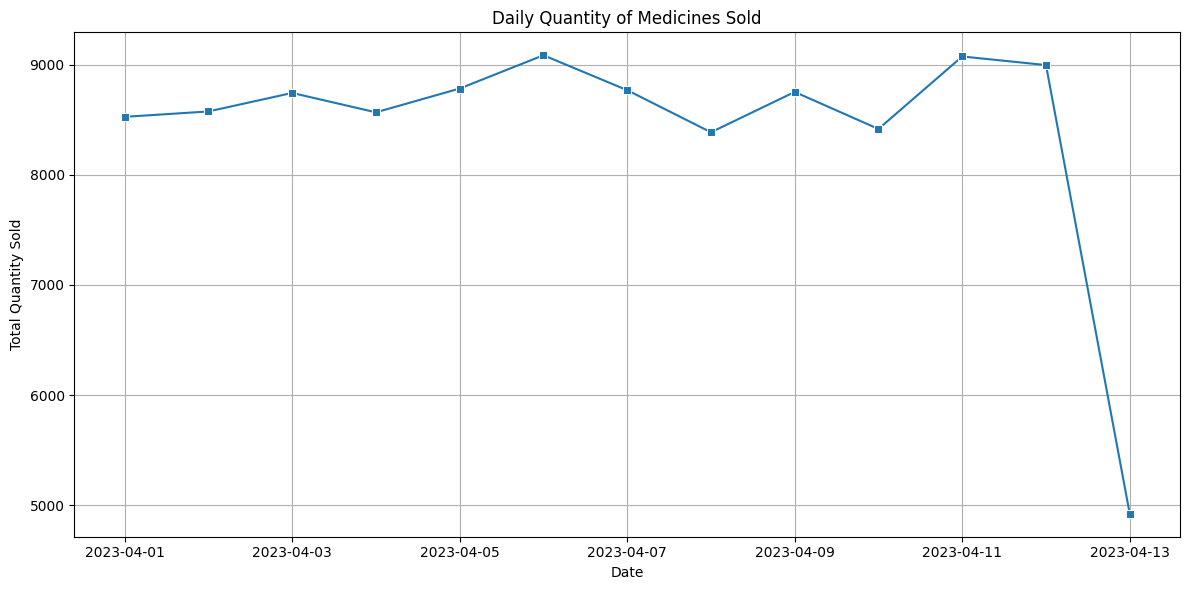

In [12]:
# Group the data by 'Date' and calculate the total quantity sold for each day
daily_quantity = df.groupby('Date')['Quantity'].sum().reset_index()

# Figure size for the plot 
plt.figure(figsize=(12, 6))

# Create a line plot & add a title
sns.lineplot(data=daily_quantity, x='Date', y='Quantity', marker='s')
plt.title("Daily Quantity of Medicines Sold")

# Label x-axis & y-axis
plt.xlabel("Date")
plt.ylabel("Total Quantity Sold")

# Add grid lines 
plt.grid(True)

# Adjust spacing 
plt.tight_layout()

# Display chart
plt.show()

### Observed Trends

- Daily quantity sold remained mostly stable, ranging between 8,400 to 9,100 units.

- Quantity peaked on April 6 and April 11, matching the peaks seen in revenue.

- A significant drop is seen on April 13, where total quantity sold fell below 5,000 units.

### Suggestions

- Peak days suggest higher demand ensure adequate stock and staffing on such days.

- Use stable quantity trends to plan weekly stock orders and manage shelf space better.

### Limitations

- The trend is based only on quantity, not revenue

- No segmentation by drug category or medicine type is included.

**This section analyzes the relationship between the total quantity of medicines sold and the total sales revenue per day using a scatter plot.**

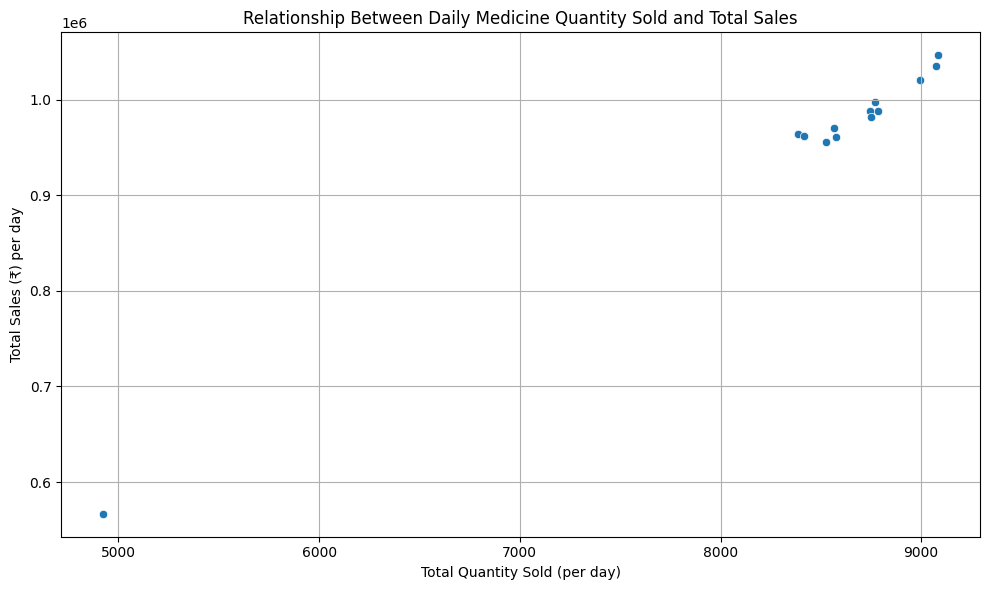

In [13]:
# Group by date to get daily totals for both revenue and quantity
daily_summary = df.groupby('Date')[['TotalSales', 'Quantity']].sum().reset_index()

# Create a scatter plot 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=daily_summary, x='Quantity', y='TotalSales')

# Add titles and labels
plt.title("Relationship Between Daily Medicine Quantity Sold and Total Sales")
plt.xlabel("Total Quantity Sold (per day)")
plt.ylabel("Total Sales (₹) per day")

# Show grid and plot
plt.grid(True)
plt.tight_layout()
plt.show()

### Observed Trends

- The quantity sold increases, total revenue also increases which indicates strong positive correlation.

- Most data points are clustered between 8,400 and 9,100 units sold, with corresponding revenues above ₹950,000.

- One clear outlier exists at the bottom left (April 13), where both quantity and revenue were significantly lower than usual.

### Suggestions

- Since quantity and revenue are closely linked, focus on increasing sales volume to boost revenue.

### Limitations

- External factors like holidays, doctor availability, or supplier delays could affect both quantity and revenue but are not considered here.

**This section explores the hourly distribution of total sales using a line chart.**

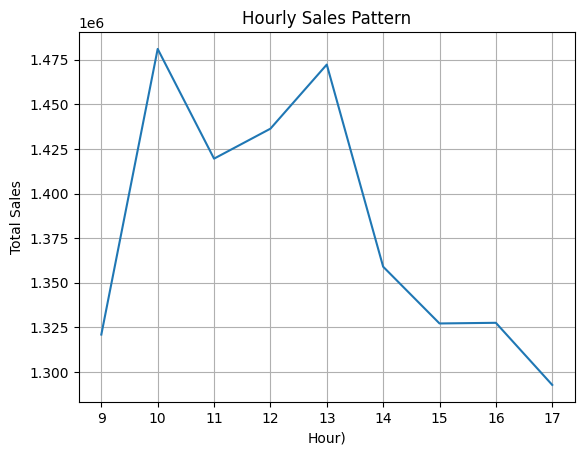

In [14]:
# Extract hour from DateTime Column
df['Hour'] = df['DateTime'].dt.hour

# Group by hour and sum TotalSales
hourlySales = df.groupby('Hour')['TotalSales'].sum().reset_index()

plt.plot(hourlySales['Hour'],hourlySales['TotalSales'])
plt.title('Hourly Sales Pattern')
plt.xlabel('Hour)')
plt.ylabel('Total Sales')
plt.xticks(range(9, 18))
plt.grid(True)
plt.show()

### Observed Trends

- Sales begin increasing after 10 AM, peak between 11 AM and 1 PM, and gradually decline in the evening.

- Sales are stable from 3 pm to 4 pm.

### Suggestions

- Align staffing and store operations with peak sales hours

- Use off-peak hours for restocking or administrative tasks, as customer traffic is lower.

### Limitations

- The chart reflects total revenue, not the number of customers

- External factors like holidays, weekends, or weather can influence pharmacy visits.

**This section visualizes the distribution of total sales across days and hours using a heatmap.**

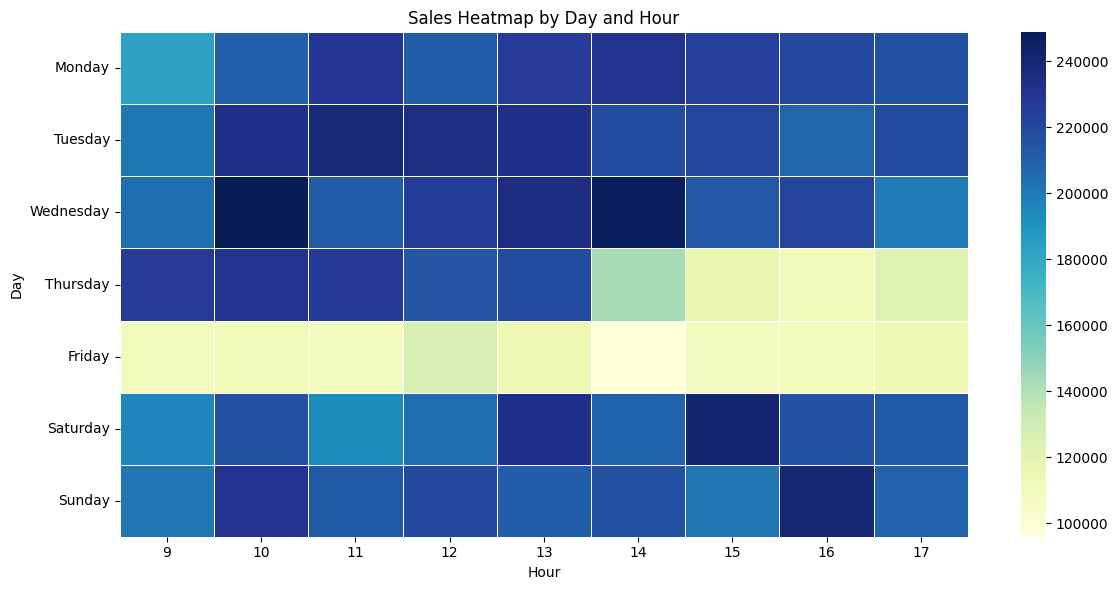

In [15]:
# Get day name and hour
df["Day"] = df["DateTime"].dt.day_name()
df["Hour"] = df["DateTime"].dt.hour

# Create heatmap data
heatmap_data = df.pivot_table(
    index="Day",
    columns="Hour",
    values="TotalSales",
    aggfunc="sum",
    fill_value=0
).reindex([
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
])

# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.5)
plt.title("Sales Heatmap by Day and Hour")
plt.xlabel("Hour")
plt.ylabel("Day")
plt.tight_layout()
plt.show()

### Observed Trends

- Monday to Wednesday, especially between 10 AM – 2 PM, Wednesday 10 AM & 2 PM are peak hours.

- Friday shows the lowest activity, particularly after 2 PM.

- Thursday Drop: Good sales in the morning, but a notable decline post-2 PM.

- Weekend: Moderate sales overall. Saturday 3 PM is a key spike; Sunday 4 PM also sees a rise.

### Suggestions

- Staffing: Increase staff during weekday peaks (10 AM–2 PM), Saturday 3 PM, and Sunday 4 PM.

- Inventory: Stock up for Mon–Wed peaks and Saturday PM, reduce excess on Fridays.

### Limitations

- High sales may reflect price, not customer volume.

- Ignores holidays, weather, or local events.